In [1]:
import numpy as np
import pandas as pd      
import matplotlib.pyplot as plt

In [2]:
data1 = pd.read_csv("dataset\data1.csv")
data2 = pd.read_csv("dataset\data2.csv")
data2 = data2.dropna()

In [3]:
annual_le = []
year = []
for i in range(1800,2017):
    annual_le.append(data2[str(i)].mean())
    year.append(i)

In [4]:
annual_le_s = pd.Series(annual_le, name = 'life_expectancy')
year_s = pd.Series(year, name = 'year')

In [5]:
data2_year = pd.concat([year_s,annual_le_s],axis=1)
data2_year = data2_year.set_index('year')

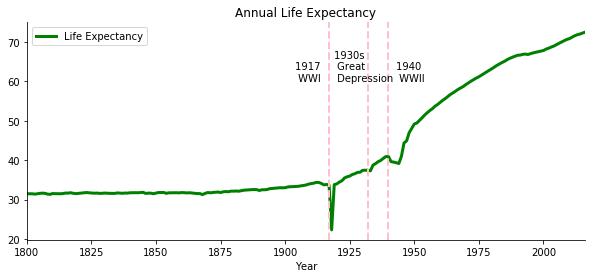

In [23]:
fig, ax = plt.subplots(figsize = (10,4))

# line graph settings
data2_year.life_expectancy.plot(ax = ax, color = 'green', linewidth = 3.0)

#labels
ax.axvline(x=1917, color='pink', linestyle='--', linewidth=2)

message = "1917 \n WWI " # Create the message, convert the number to a string,
                                                  # then add it 
ax.text(1915, 60, message, horizontalalignment='right') # then alling everything on the

ax.axvline(x=1940, color='pink', linestyle='--', linewidth=2)

message = "1940 \n WWII" # Create the message, convert the number to a string,
                                                  # then add it 
ax.text(1943, 60, message, horizontalalignment='left') # then alling everything on the

ax.axvline(x=1932, color='pink', linestyle='--', linewidth=2)

message = "1930s \n Great \n Depression" # Create the message, convert the number to a string,
                                                  # then add it 
ax.text(1919, 60, message, horizontalalignment='left') # then alling everything on the

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_xlabel("Year")
ax.set_xlim(1800,2016)
ax.set_title("Annual Life Expectancy") # Lable the y axis (only once since its the same for both)
ax.legend(["Life Expectancy"],frameon=True)

plt.show()

In [7]:
drop_list = ['Country','Adult Mortality','Status','infant deaths', 'under-five deaths ']
data1 = data1.drop(drop_list, axis = 1)
data1['thinness'] = data1[' thinness  1-19 years']+data1[' thinness 5-9 years']

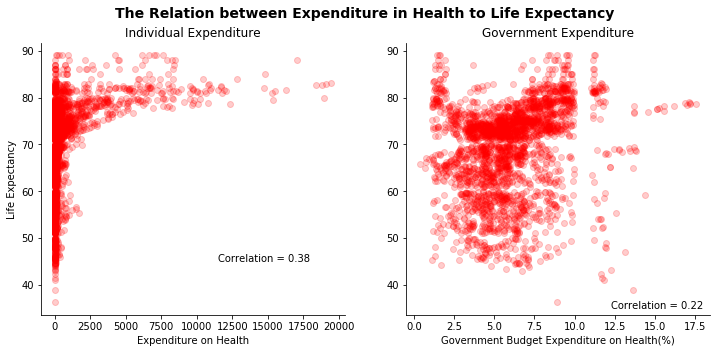

In [31]:
# Code for scatter plot comparing metascore against sales and user score against sales
fig, ax = plt.subplots(nrows = 1, ncols = 2, sharex = False, figsize = (12,5))
corr_mat = data1.corr()

#labels
fig.suptitle("The Relation between Expenditure in Health to Life Expectancy", fontsize = 14, fontweight = "bold") 
ax[0].set_title("Individual Expenditure", fontsize = 12) 
ax[1].set_title("Government Expenditure", fontsize = 12)

count = 0
name_list = ['percentage expenditure','Total expenditure']

for var in ax: 
    var.scatter(data1[name_list[count]], data1["Life expectancy "], alpha= 0.2, c = 'Red')
    var.spines["right"].set_visible(False)
    var.spines["top"].set_visible(False)
    cr = corr_mat['Life expectancy '][name_list[count]] # get the correlation matrix
    message = "Correlation = " + str(round(cr,2))
    if count == 0:
        var.text(18000, 45, message, horizontalalignment='right')
    else:
        var.text(18,35,message, horizontalalignment = 'right')
    count+=1
ax[0].set_ylabel("Life Expectancy")

ax[0].set_xlabel("Expenditure on Health")
ax[1].set_xlabel("Government Budget Expenditure on Health(%)")
plt.show()

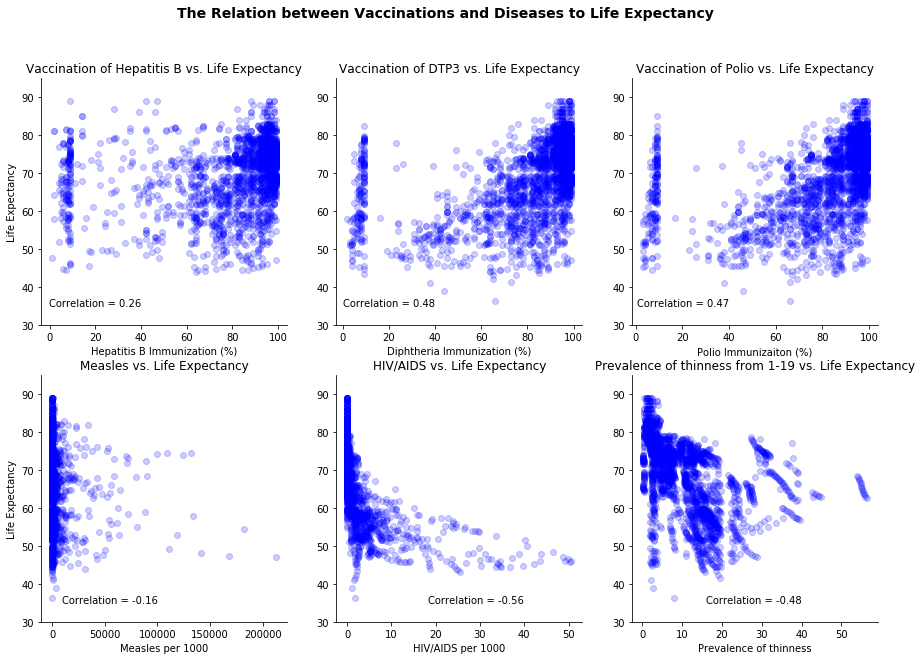

In [32]:
# Code for scatter plot comparing metascore against sales and user score against sales
fig, ax = plt.subplots(nrows = 2, ncols = 3, sharex = False, figsize = (15,10))
ax = ax.ravel()
#labels
fig.suptitle("The Relation between Vaccinations and Diseases to Life Expectancy", fontsize = 14, fontweight = "bold") 

count = 0
name_list = ['Hepatitis B', 'Diphtheria ','Polio', 'Measles ', ' HIV/AIDS','thinness']

for var in ax: 
    var.scatter(data1[name_list[count]], data1["Life expectancy "], alpha= 0.2, c = 'Blue')
    var.spines["right"].set_visible(False)
    var.spines["top"].set_visible(False)
    cr = corr_mat['Life expectancy '][name_list[count]] # get the correlation matrix
    message = "Correlation = " + str(round(cr,2))
    var.set_ylim(30,95)
    if count == 0:
        var.set_title("Vaccination of Hepatitis B vs. Life Expectancy", fontsize = 12)
        var.set_xlabel("Hepatitis B Immunization (%)")
        var.text(40, 35, message, horizontalalignment='right')
    elif count == 1:
        var.set_title("Vaccination of DTP3 vs. Life Expectancy", fontsize = 12)
        var.set_xlabel("Diphtheria Immunization (%)")
        var.text(40, 35, message, horizontalalignment='right')
    elif count == 2:
        var.set_title("Vaccination of Polio vs. Life Expectancy", fontsize = 12)
        var.set_xlabel("Polio Immunizaiton (%)")
        var.text(40, 35, message, horizontalalignment='right')
    elif count == 3:
        var.set_title("Measles vs. Life Expectancy", fontsize = 12)
        var.set_xlabel("Measles per 1000")
        var.text(100000, 35, message, horizontalalignment='right')
    elif count == 4:
        var.set_title("HIV/AIDS vs. Life Expectancy", fontsize = 12)
        var.set_xlabel("HIV/AIDS per 1000")
        var.text(40, 35, message, horizontalalignment='right')
    else:
        var.set_title("Prevalence of thinness from 1-19 vs. Life Expectancy", fontsize = 12)
        var.set_xlabel("Prevalence of thinness")
        var.text(40, 35, message, horizontalalignment='right')
        
    count+=1
ax[0].set_ylabel("Life Expectancy")
ax[3].set_ylabel("Life Expectancy")
plt.show()

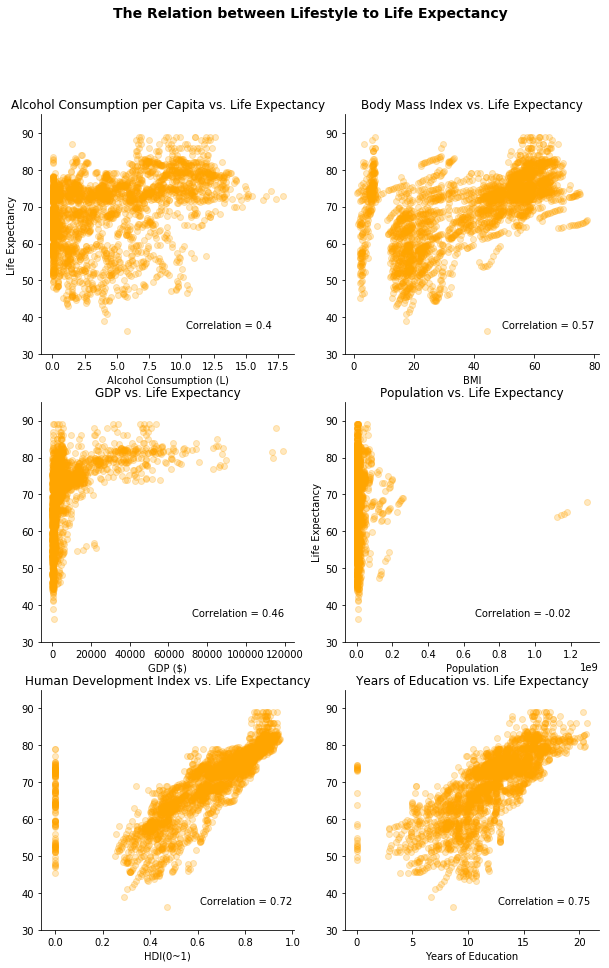

In [55]:
# Code for scatter plot comparing metascore against sales and user score against sales
fig, ax = plt.subplots(nrows = 3, ncols = 2, sharex = False, figsize = (10,15))
ax = ax.ravel()
#labels
fig.suptitle("The Relation between Lifestyle to Life Expectancy", fontsize = 14, fontweight = "bold") 

count = 0
name_list = [ 'Alcohol',' BMI ','GDP', 'Population','Income composition of resources', 'Schooling']

for var in ax: 
    var.scatter(data1[name_list[count]], data1["Life expectancy "], alpha= 0.25, c = 'orange')
    var.spines["right"].set_visible(False)
    var.spines["top"].set_visible(False)
    cr = corr_mat['Life expectancy '][name_list[count]] # get the correlation matrix
    message = "Correlation = " + str(round(cr,2))
    var.set_ylim(30,95)
    if count == 0:
        var.set_title("Alcohol Consumption per Capita vs. Life Expectancy", fontsize = 12)
        var.set_xlabel("Alcohol Consumption (L)")
        var.text(17, 37, message, horizontalalignment='right')
    elif count == 1:
        var.set_title("Body Mass Index vs. Life Expectancy", fontsize = 12)
        var.set_xlabel("BMI")
        var.text(80, 37, message, horizontalalignment='right')
    elif count == 2:
        var.set_title("GDP vs. Life Expectancy", fontsize = 12)
        var.set_xlabel("GDP ($)")
        var.text(120000, 37, message, horizontalalignment='right')
    elif count == 3:
        var.set_title("Population vs. Life Expectancy", fontsize = 12)
        var.set_xlabel("Population")
        var.text(1200000000, 37, message, horizontalalignment='right')
    elif count == 4:
        var.set_title("Human Development Index vs. Life Expectancy", fontsize = 12)
        var.set_xlabel("HDI(0~1)")
        var.text(1, 37, message, horizontalalignment='right')
    else:
        var.set_title("Years of Education vs. Life Expectancy", fontsize = 12)
        var.set_xlabel("Years of Education")
        var.text(21, 37, message, horizontalalignment='right')
        
    count+=1
ax[0].set_ylabel("Life Expectancy")
ax[3].set_ylabel("Life Expectancy")
plt.show()